In [77]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [21]:
import pandas as pd
from textblob import TextBlob

#df = pd.read_csv('tweetsUsuariosBancoPichincha.csv')
df = pd.read_excel(r"C:\Users\Alexander Dueñas\Documents\GitHub\Natural-Language-Processing\tweetsUsuariosBancoPichincha.xlsx", sheet_name='tweetsUsuariosBancoPichincha')

In [22]:
df.insert(
    loc=4,
    column='TweetEN',
    value=[str(TextBlob(df['Tweet'][i]).translate(from_lang="es", to="en")) for i in df.index]
)

In [3]:
df.insert(
    loc=5,
    column='Tags',
    value=[TextBlob(df['TweetEN'][i]).tags for i in df.index]
)

In [4]:
#The polarity score is a float within the range [-1.0, 1.0].
df.insert(
    loc=6,
    column='Polarity',
    value=[TextBlob(df['TweetEN'][i]).sentiment.polarity for i in df.index]
)

In [5]:
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df.insert(
    loc=7,
    column='Subjectivity',
    value=[TextBlob(df['TweetEN'][i]).sentiment.subjectivity for i in df.index]
)

In [6]:
df

,Number,Date,User,Tweet,TweetEN,Tags,Polarity,Subjectivity
0,1,2023-05-26,NaN,El reclamo es de un pago del 3 de Abril que as...,The claim is of a payment of April 3 that appe...,"[(The, DT), (claim, NN), (is, VBZ), (of, IN), ...",0.50000,0.50000
1,2,2023-05-26,NaN,@BancoPichincha no acredita un pago hecho desd...,@Bancopichincha does not prove a payment made ...,"[(@, JJ), (Bancopichincha, NNP), (does, VBZ), ...",-0.30000,0.80000
2,3,2023-05-26,NaN,@BancoPichincha señores. Estamos bloqueados la...,@Bancopichincha gentlemen. We are blocked the ...,"[(@, JJ), (Bancopichincha, NNP), (gentlemen, N...",0.00000,0.00000
3,4,2023-05-26,NaN,Me acaba de pasar lo mismo me cancelan la tarj...,The same thing has just happened to me the car...,"[(The, DT), (same, JJ), (thing, NN), (has, VBZ...",-0.50000,0.56250
4,5,2023-05-26,NaN,TE ODIO @BancoPichincha,I hate you @Bancopichincha,"[(I, PRP), (hate, VBP), (you, PRP), (@, VBP), ...",-0.80000,0.90000
...,...,...,...,...,...,...,...,...
162,163,2023-04-18,CrisCrdoba2,@TwiggyOrgana @BancoPichincha Saca todos los c...,@Twiggyorgana @Bancopichincha takes out all ce...,"[(@, JJ), (Twiggyorgana, NNP), (@, NNP), (Banc...",0.00000,0.00000
163,164,2023-04-18,jessica_lopezp,@BancoPichincha Me puede indicar por favor cóm...,@Bancopichincha can tell me please how I must ...,"[(@, JJ), (Bancopichincha, NNP), (can, MD), (t...",0.25000,0.20000
164,165,2023-04-18,jessica_lopezp,@BancoPichincha A un familiar le clonaron la c...,@Bancopichincha a relative cloned his messenge...,"[(@, NN), (Bancopichincha, NNP), (a, DT), (rel...",0.00000,0.00000
165,166,2023-04-18,TwiggyOrgana,@BancoPichincha He pasado tres días en el telé...,@Bancopichincha I have spent three days on the...,"[(@, JJ), (Bancopichincha, NNP), (I, PRP), (ha...",-0.05625,0.29375


In [15]:
from statistics import mean

NPS = mean(df['Polarity']) * 100
print('El NPS obtenido es de: ', str(NPS) + ' %')

El NPS obtenido es de:  4.586901953668421 %


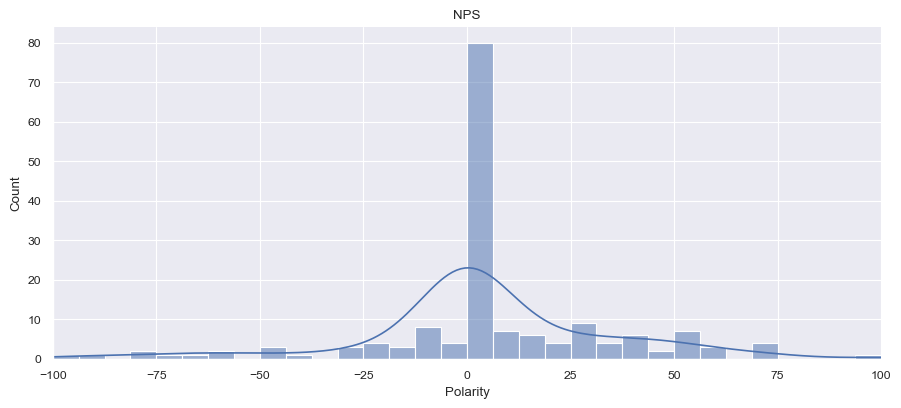

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_context("paper")
sns.displot(df['Polarity']*100, kde=True, height=4, aspect=9/4).set(title="NPS")
plt.xlim(-100, 100)
plt.show()

In [9]:
df['TweetLabel'] = df['Polarity'].apply(lambda x: 'Negative' if x < 0 else ('Neutral' if x == 0 else 'Positive'))

In [10]:
df

,Number,Date,User,Tweet,TweetEN,Tags,Polarity,Subjectivity,TweetLabel
0,1,2023-05-26,NaN,El reclamo es de un pago del 3 de Abril que as...,The claim is of a payment of April 3 that appe...,"[(The, DT), (claim, NN), (is, VBZ), (of, IN), ...",0.50000,0.50000,Positive
1,2,2023-05-26,NaN,@BancoPichincha no acredita un pago hecho desd...,@Bancopichincha does not prove a payment made ...,"[(@, JJ), (Bancopichincha, NNP), (does, VBZ), ...",-0.30000,0.80000,Negative
2,3,2023-05-26,NaN,@BancoPichincha señores. Estamos bloqueados la...,@Bancopichincha gentlemen. We are blocked the ...,"[(@, JJ), (Bancopichincha, NNP), (gentlemen, N...",0.00000,0.00000,Neutral
3,4,2023-05-26,NaN,Me acaba de pasar lo mismo me cancelan la tarj...,The same thing has just happened to me the car...,"[(The, DT), (same, JJ), (thing, NN), (has, VBZ...",-0.50000,0.56250,Negative
4,5,2023-05-26,NaN,TE ODIO @BancoPichincha,I hate you @Bancopichincha,"[(I, PRP), (hate, VBP), (you, PRP), (@, VBP), ...",-0.80000,0.90000,Negative
...,...,...,...,...,...,...,...,...,...
162,163,2023-04-18,CrisCrdoba2,@TwiggyOrgana @BancoPichincha Saca todos los c...,@Twiggyorgana @Bancopichincha takes out all ce...,"[(@, JJ), (Twiggyorgana, NNP), (@, NNP), (Banc...",0.00000,0.00000,Neutral
163,164,2023-04-18,jessica_lopezp,@BancoPichincha Me puede indicar por favor cóm...,@Bancopichincha can tell me please how I must ...,"[(@, JJ), (Bancopichincha, NNP), (can, MD), (t...",0.25000,0.20000,Positive
164,165,2023-04-18,jessica_lopezp,@BancoPichincha A un familiar le clonaron la c...,@Bancopichincha a relative cloned his messenge...,"[(@, NN), (Bancopichincha, NNP), (a, DT), (rel...",0.00000,0.00000,Neutral
165,166,2023-04-18,TwiggyOrgana,@BancoPichincha He pasado tres días en el telé...,@Bancopichincha I have spent three days on the...,"[(@, JJ), (Bancopichincha, NNP), (I, PRP), (ha...",-0.05625,0.29375,Negative


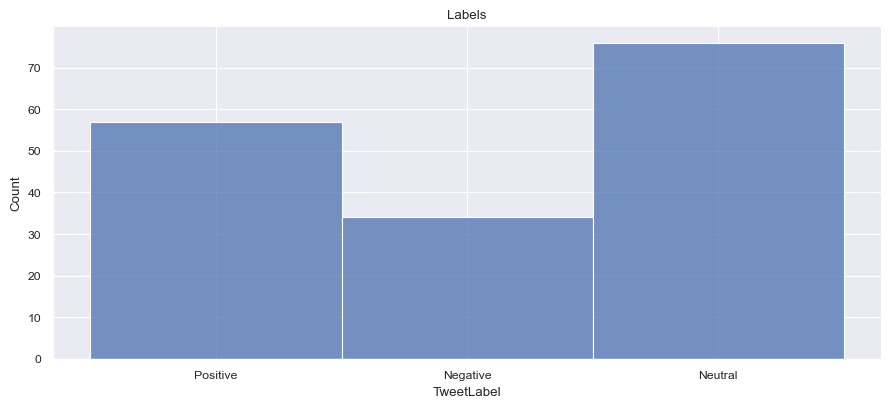

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_context("paper")
sns.displot(df['TweetLabel'], height=4, aspect=9/4).set(title="Labels")
plt.show()

In [23]:
import re # Procesamiento de Texto
from collections import defaultdict
import spacy # Procesamiento NLP
from spellchecker import SpellChecker

# Cargamos los métodos de Spacy en Ingles 
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
spell = SpellChecker() # Corrector ortográfico

replacements = [ # Limpiamos el texto
            '((www\.[^\s]+)|(https?://[^\s]+))', # Limpiamos URL
            '@[^\s]+', # Limpiamos nombres de usuarios
            '#([^\s]+)', # Limpiamos hashtags
            "[^A-Za-z' ]+"  # Eliminamos todo lo que no sea letras
            ]
# Re nos permite compilar varias transformaciones en un solo iterador, 
# así nos evitamos iterar varias veces por el mismo documento, incrementando eficiencia. 
regex = re.compile('|'.join(r for r in replacements),re.IGNORECASE)

def limpia_comments(review, spellchecker=False): 
  """Función para limpiar y pre-procesar tweets. Incluye: 
  - Eliminación de hashtags, urls y usuarios 
  - Tokenización 
  - Corrector gramatical (inglés)
  :param tweet: String, cadena de texto (idealmente un tweet),
  :return: Una lista con tokens del tweet."""
  # Empezamos transformando a minúsculas
  clean_review = str(review).lower()
  # Limpiamos usuarios, URL's y hashtags
  clean_review = regex.sub('', clean_review)
  # Añadimos limpieza de caracteres repetidos
  clean_review = re.sub(r'(.)\1+', r'\1\1', clean_review).split()
  if spellchecker:
    # Encuentra las que tienen errores
    misspelled = spell.unknown(clean_review)
    # Corregimos el tweet
    clean_review = [
        spell.correction(word) if word in misspelled else word for word in clean_review]
  return ' '.join(clean_review)

In [24]:
def cleaning(doc):
  """Lemmatiza y elimina stopwords
  Necesitamos un doc como lo describe spacy
  :param doc: DOC según lo describe Spacy. 
  :return: Una cadena de texto."""
  txt = [token.lemma_ for token in doc if not token.is_stop]
  return ' '.join(txt)
# Funcion de limpieza del tweet que entrará al pipe de Spacy(NLP)
comment_cleaning = (limpia_comments(row) for row in df['TweetEN'])

In [25]:
from time import time  # Mide el tiempo de ejecución
t = time() # Calculamos el tiempo
txt = [cleaning(doc) for doc in nlp.pipe(comment_cleaning,
                                         batch_size=5000, 
                                         n_process=-1 # Usamos todos los cores
                                         )]
t_ = round((time() - t) / 60, 2) # Obtenemos el tiempo de ejecucion en minutos
print(f'Tiempo de ejecución: {t_} mins')

Tiempo de ejecución: 0.3 mins


In [30]:
df['TweetClean'] = txt
df['TweetClean']

0      claim payment april appear statement state cha...
1      prove payment bolivarian direct payment immedi...
2      gentleman block account reason bank know yeste...
3      thing happen card analysis enter return debt v...
4                                                   hate
                             ...                        
162                                            take cent
163    tell proceed denounce owner account money depo...
164    relative clone messenger account write ask mon...
165    spend day phone employee inept need review cas...
166                     tomorrow go close saving account
Name: TweetClean, Length: 167, dtype: object

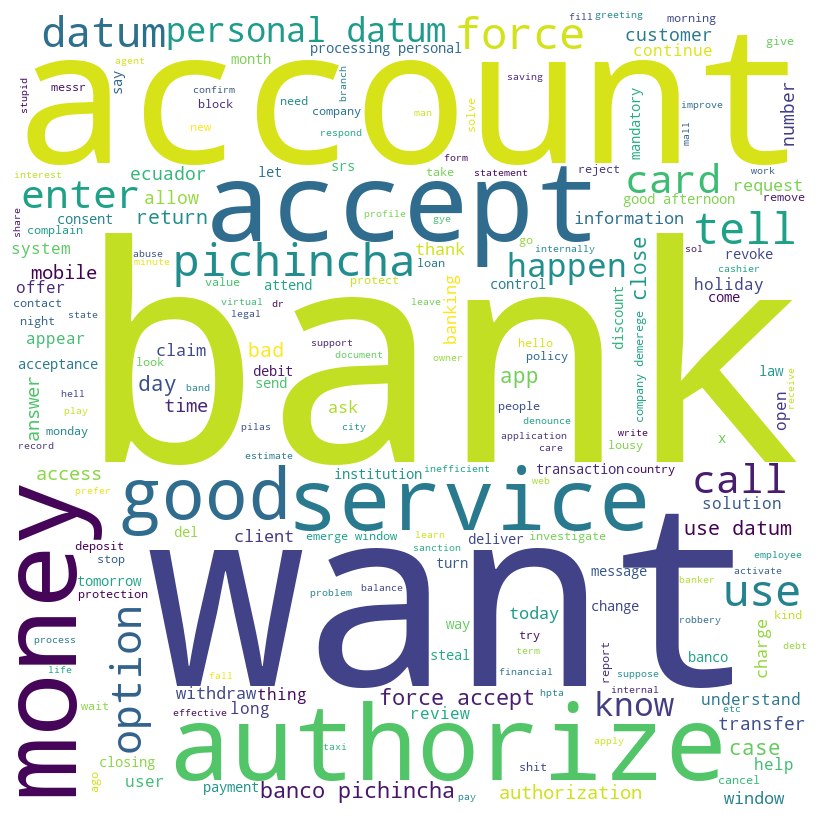

In [24]:
from wordcloud import WordCloud

comment_words = ''

for val in df['TweetClean']:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)): # Converts each token into lowercase
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
                   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [25]:
# Convertimos la columna en múltiples filas
dfWords  = pd.DataFrame(df['TweetClean'].str.split(' ', expand=True).stack(), columns=['Words'])
# Filtramos las 15 palabras más repetidas
words = dfWords.groupby(['Words'])['Words'].count().nlargest(15)
words

Words
bank         43
datum        34
accept       31
want         29
account      26
pichincha    26
force        25
use          23
good         19
money        19
authorize    18
service      16
banco        15
tell         14
option       13
Name: Words, dtype: int64

<AxesSubplot:title={'center':'Words Frequency'}, xlabel='Words', ylabel='Count'>

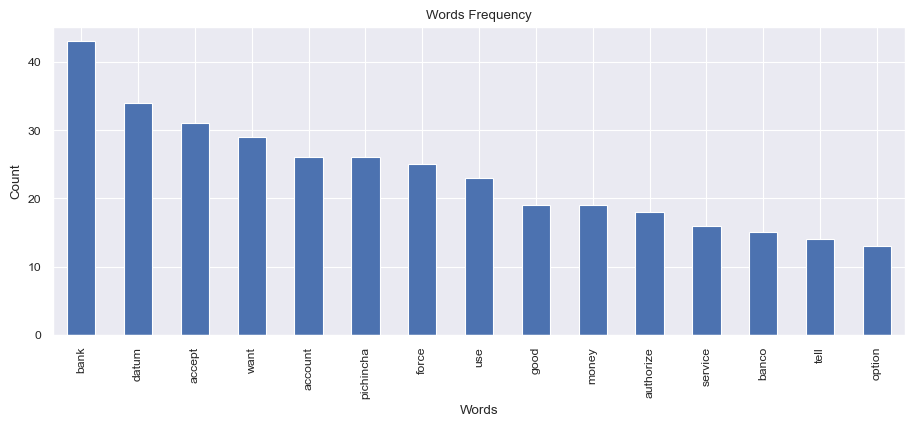

In [26]:
plt.rcParams["figure.figsize"] = (11,4)
plt.ylabel("Count")
dfWords.groupby(['Words'])['Words'].count().nlargest(15).plot(
kind='bar', title='Words Frequency')

In [27]:
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
import gensim.downloader as api

# Phraser une palabras que usualmente están juntas,
# Por ejemplo Big Data -> big_data
sentences  = [row.split() for row in df['TweetClean'] if row]
phrases = Phrases(sentences, min_count=10, progress_per=10000)
bigram = Phraser(phrases)
ngram_sentences = bigram[sentences] 
# Vemos el vocabulario que hemos creado 
# Sanity check 
word_freq = defaultdict(int)
for sent in ngram_sentences:
    for i in sent:
        word_freq[i] += 1
print(f'El corpus tiene {len(word_freq)} palabras') 

El corpus tiene 603 palabras


In [28]:
# Miramos las palabras más comunes 
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['bank',
 'datum',
 'accept',
 'want',
 'account',
 'pichincha',
 'force',
 'use',
 'money',
 'good']

In [29]:
sorted(
    {w: v for w,v in word_freq.items() if "_" in w},
    key=word_freq.get,
    reverse=True
)[:10]

[]

In [30]:
import multiprocessing

cores = multiprocessing.cpu_count() # Cuenta el num de cores disponibles
#  The model (see Gensim's Word2Vec for more info )
w2v_model = Word2Vec(
    min_count=10,  # Num Mínimo de apariciones
    window=2,
    sample=6e-5, 
    alpha=0.03, 
    min_alpha=0.0007, 
    negative=20,       
    workers=cores-1   # A toda maquina
    )
#  Construimos el vocablo para gensim
w2v_model.build_vocab(ngram_sentences, progress_per=10000)

#  Entrenamos el modelo (Toma unos minutos)

w2v_model.train(
    ngram_sentences, 
    total_examples=w2v_model.corpus_count, 
    epochs=30, # Mientras más epochs, más iteraciones de entrenamiento.
    report_delay=1   
    )

(570, 45120)

In [31]:
# Palabra más similar a homero
w2v_model.wv.most_similar(positive=["banco"])

[('pichincha', 0.16442082822322845),
 ('close', 0.1453670859336853),
 ('case', 0.13138554990291595),
 ('authorize', 0.13031761348247528),
 ('bank', 0.11095112562179565),
 ('option', 0.10230112820863724),
 ('app', 0.06389781087636948),
 ('call', 0.05849117785692215),
 ('accept', 0.05456322059035301),
 ('datum', 0.0357707217335701)]

In [32]:
# Palabra más similar a homero
w2v_model.wv.most_similar(negative=["banco"])

[('account', 0.12616804242134094),
 ('day', 0.09947553277015686),
 ('personal', 0.09572161734104156),
 ('know', 0.08362282812595367),
 ('tell', 0.05685966834425926),
 ('enter', 0.05233289673924446),
 ('money', 0.04801643639802933),
 ('good', 0.031214052811264992),
 ('use', 0.028850480914115906),
 ('service', 0.027150606736540794)]

In [37]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#  Plotting
def tsnescatterplot(model: Word2Vec, word: str, list_names: list):
    """ 
    Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    :param model: A gensim word2vec model. 
    :param word: Keyword to compare to the list_names
    :param list_names: A user defined set list of words to compare to the main word.
    :return: A plot
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 20 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={
                         's': 40,
                         'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(
            df["x"][line],
            df['y'][line],
            '  ' + df["words"][line].title(),
            horizontalalignment='left',
            verticalalignment='bottom', size='medium',
            color=df['color'][line],
            weight='normal'
            ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title(f't-SNE visualization for {word.title()}')
    plt.show();

c:\Users\Alexander Dueñas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Alexander Dueñas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


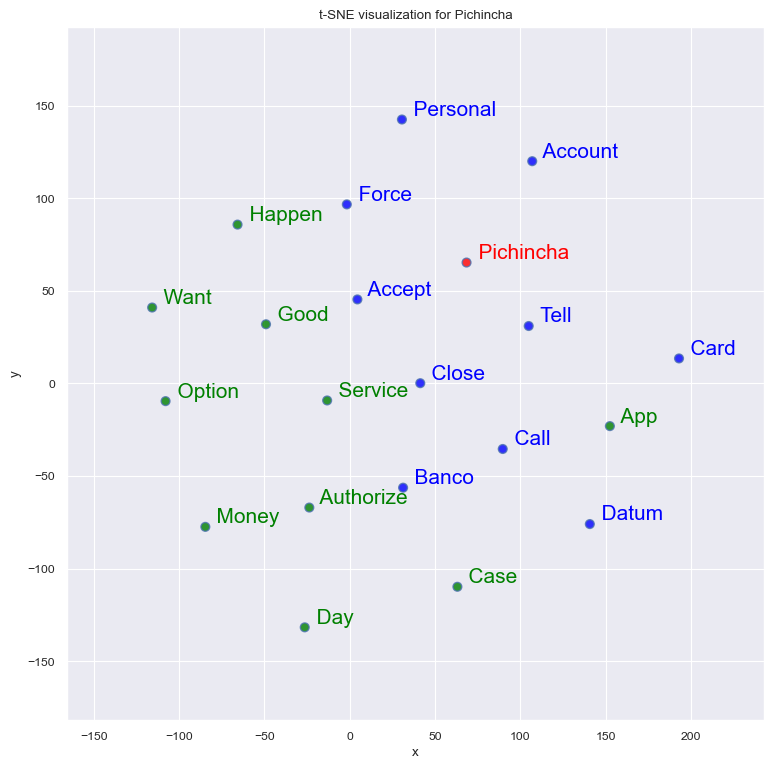

In [38]:
main_word = "pichincha"  # Palabra buscada
alternative_list =  [
    i[0] for i in w2v_model.wv.most_similar(
        negative=[main_word]  # Palabras negativas (opuestas)
        )
    ] 
# Llamamos a nuestra función
#alternative_list
tsnescatterplot(w2v_model, main_word, alternative_list)

In [43]:
import nltk

# Convertimos la columna en múltiples filas
dfWords  = pd.DataFrame(df['TweetClean'].str.split(' ', expand=True).stack(), columns=['Words'])
bigrams = nltk.bigrams(dfWords['Words'])
dfBigrams = pd.DataFrame(bigrams, columns=['First word','Second word'])
dfBigrams['Bigrams'] = dfBigrams['First word'].str.cat(dfBigrams['Second word'], sep=' ')
dfBigrams

,First word,Second word,Bigrams
0,claim,payment,claim payment
1,payment,april,payment april
2,april,appear,april appear
3,appear,statement,appear statement
4,statement,state,statement state
...,...,...,...
1498,service,tomorrow,service tomorrow
1499,tomorrow,go,tomorrow go
1500,go,close,go close
1501,close,saving,close saving


In [46]:
from wordcloud import WordCloud

comment_words = ''

for val in df['TweetClean']:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)): # Converts each token into lowercase
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

comment_words
 
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 min_font_size = 10).generate(comment_words)
                   
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
# plt.show()

'claim payment april appear statement state charge answer mall del sol answer state return value prove payment bolivarian direct payment immediately hour charge collection int expenditure mora file claim answer mall del sol abuse cardholder terrible gentleman block account reason bank know yesterday confirm datum unlock family account use money inefficient money thing happen card analysis enter return debt value bad hate hello good afternoon account appear restriction money holiday agency available question block customer service number tell solve dr good afternoon bank pichincha attend normally tomorrow ecuador good afternoon nose possible situation allow discount money authorization sign request money want grow money improve financial share investment tip help achieve invest future banco pichincha panama transfer annoy banking system transfer night weekend holiday wait monday effective ecuador play silver people law support reflect driver recharge dollar know good morning branch atte

In [41]:
# Filtramos las 15 palabras más repetidas
bigrams = dfBigrams.groupby('Bigrams')['Bigrams'].count().nlargest(15)
bigrams

Bigrams
personal datum         12
banco pichincha        11
force accept           11
use datum               9
pichincha bank          8
authorize use           6
want force              6
mobile bank             5
bank force              4
close window            4
good afternoon          4
good day                4
option close            4
processing personal     4
accept use              3
Name: Bigrams, dtype: int64

<AxesSubplot:title={'center':'Words Frequency'}, xlabel='Bigrams', ylabel='Count'>

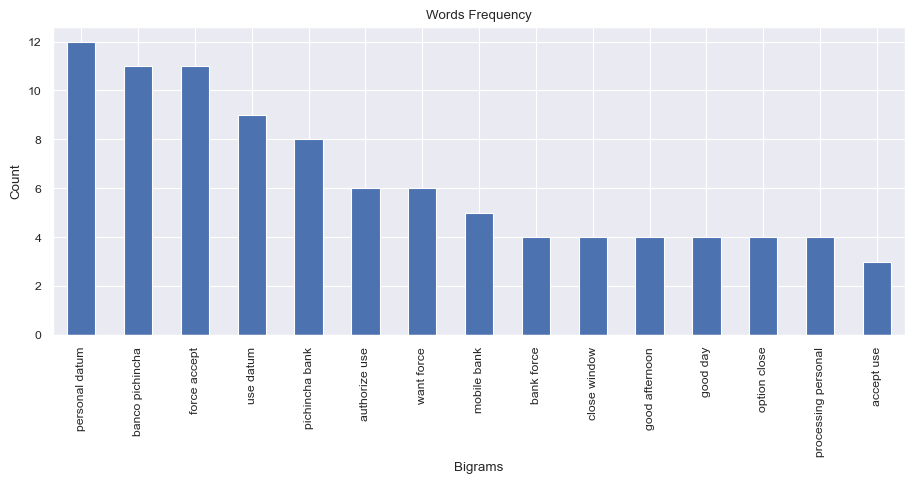

In [42]:
plt.rcParams["figure.figsize"] = (11,4)
plt.ylabel("Count")
dfBigrams.groupby('Bigrams')['Bigrams'].count().nlargest(15).plot(
kind='bar', title='Words Frequency')